# Playoff LeBron

Let's make some charts that investigate whether 'Playoff LeBron' really exists, and how he differs from his idols and contemporaries alike!

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Set theme
sns.set_style('whitegrid')

## 1. Load full stats dataset (all players)
**Note: CAN SKIP ALL THIS AND JUST LOAD THE PRE-WRANGLED/FORMATTED CSV -- SKIP TO BOTTOM**

In [2]:
stats = pd.read_csv('/Users/TBD/Documents/DevStuff/DataSciProjects/NBAPlayerMovement/Seasons_Stats.csv')

In [3]:
#list(stats.columns.values)

# Remove unnecessary columns
dumb_cols = ["Unnamed: 0", "blanl", "blank2"]

stats.drop(dumb_cols, axis=1, inplace=True)

In [4]:
stats = stats[stats.Year >= 1980]
stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [5]:
# Remove those pesky trailing asteric's
for n in stats['Player']:
    try:
        if n.endswith('*'):
            stats['Player'] = stats['Player'].replace(n, n[:-1])
    except:
        continue

In [6]:
stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980.0,Kareem Abdul-Jabbar,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


### Load individual players playoff stats datasets

In [7]:
# First, load playoff totals
lbj_playoffs_totals = pd.read_csv('datasets/lebron_playoffs_totals.csv')  # LeBron
bird_playoffs_totals = pd.read_csv('datasets/bird_playoffs_totals.csv')   # Larry Bird
magic_playoffs_totals = pd.read_csv('datasets/magic_playoffs_totals.csv') # Magiv Johnson
kobe_playoffs_totals = pd.read_csv('datasets/kobe_playoffs_totals.csv')   # Kobe Bryant
curry_playoffs_totals = pd.read_csv('datasets/curry_playoffs_totals.csv') # Steph Curry
chrispaul_playoffs_totals = pd.read_csv('datasets/chrispaul_playoffs_totals.csv') # Chris Paul
kg_playoffs_totals = pd.read_csv('datasets/kg_playoffs_totals.csv')  # Kevin Garnett
mj_playoffs_totals = pd.read_csv('datasets/mj_playoffs_totals.csv')  # Michael Jordan
harden_playoffs_totals = pd.read_csv('datasets/harden_playoffs_totals.csv')  # James Harden
durant_playoffs_totals = pd.read_csv('datasets/durant_playoffs_totals.csv')  # Kevin Durant
westbrook_playoffs_totals = pd.read_csv('datasets/westbrook_playoffs_totals.csv') # Russell Westbrook
nash_playoffs_totals = pd.read_csv('datasets/nash_playoffs_totals.csv')  # Steve Nash
shaq_playoffs_totals = pd.read_csv('datasets/shaq_playoffs_totals.csv')  # Shaquiel O'Neal
duncan_playoffs_totals = pd.read_csv('datasets/duncan_playoffs_totals.csv')  # Tim Duncan
wade_playoffs_totals = pd.read_csv('datasets/wade_playoffs_totals.csv')  # Dwyane Wade

In [7]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_playoffs_totals)

In [8]:
# Next, load playoffs advanced stats
lbj_playoffs_advanced = pd.read_csv('datasets/lebron_playoffs_advanced.csv')  # LeBron
bird_playoffs_advanced = pd.read_csv('datasets/bird_playoffs_advanced.csv')   # Larry Bird
magic_playoffs_advanced = pd.read_csv('datasets/magic_playoffs_advanced.csv') # Magiv Johnson
kobe_playoffs_advanced = pd.read_csv('datasets/kobe_playoffs_advanced.csv')   # Kobe Bryant
curry_playoffs_advanced = pd.read_csv('datasets/curry_playoffs_advanced.csv') # Steph Curry
chrispaul_playoffs_advanced = pd.read_csv('datasets/chrispaul_playoffs_advanced.csv') # Chris Paul
kg_playoffs_advanced = pd.read_csv('datasets/kg_playoffs_advanced.csv')  # Kevin Garnett
mj_playoffs_advanced = pd.read_csv('datasets/mj_playoffs_advanced.csv')  # Michael Jordan
harden_playoffs_advanced = pd.read_csv('datasets/harden_playoffs_advanced.csv')  # James Harden
durant_playoffs_advanced = pd.read_csv('datasets/durant_playoffs_advanced.csv')  # Kevin Durant
westbrook_playoffs_advanced = pd.read_csv('datasets/westbrook_playoffs_advanced.csv') # Russell Westbrook
nash_playoffs_advanced = pd.read_csv('datasets/nash_playoffs_advanced.csv')  # Steve Nash
shaq_playoffs_advanced = pd.read_csv('datasets/shaq_playoffs_advanced.csv')  # Shaquiel O'Neal
duncan_playoffs_advanced = pd.read_csv('datasets/duncan_playoffs_advanced.csv')  # Tim Duncan
wade_playoffs_advanced = pd.read_csv('datasets/wade_playoffs_advanced.csv')  # Dwyane Wade

In [10]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_playoffs_adv)

## 2. Merge the playoff totals and advanced stats together.

In [9]:
# Get adv stat fields to merge into playoff_stats.
# Will assume I can use LeBrons columns as a proxy for all players
cols_to_use = lbj_playoffs_advanced.columns.difference(lbj_playoffs_totals.columns)
#type(cols_to_use)

# LeBron
lbj_playoffs_adv2 = lbj_playoffs_advanced[cols_to_use]
lbj_playoffs_adv2['Season'] = lbj_playoffs_advanced.loc[:, 'Season']
lbj_playoffs = pd.merge(lbj_playoffs_totals, lbj_playoffs_adv2, on='Season', how='left')

# Larry Bird
bird_playoffs_advanced2 = bird_playoffs_advanced[cols_to_use]
bird_playoffs_advanced2['Season'] = bird_playoffs_advanced.loc[:, 'Season']
bird_playoffs = pd.merge(bird_playoffs_totals, bird_playoffs_advanced2, on='Season', how='left')

# Magic Johnson
magic_playoffs_advanced2 = magic_playoffs_advanced[cols_to_use]
magic_playoffs_advanced2['Season'] = magic_playoffs_advanced.loc[:, 'Season']
magic_playoffs = pd.merge(magic_playoffs_totals, magic_playoffs_advanced2, on='Season', how='left')

# Kobe Bryant
kobe_playoffs_advanced2 = kobe_playoffs_advanced[cols_to_use]
kobe_playoffs_advanced2['Season'] = kobe_playoffs_advanced.loc[:, 'Season']
kobe_playoffs = pd.merge(kobe_playoffs_totals, kobe_playoffs_advanced2, on='Season', how='left')

# Steph Curry
curry_playoffs_advanced2 = curry_playoffs_advanced[cols_to_use]
curry_playoffs_advanced2['Season'] = curry_playoffs_advanced.loc[:, 'Season']
curry_playoffs = pd.merge(curry_playoffs_totals, curry_playoffs_advanced2, on='Season', how='left')

# Chris Paul
chrispaul_playoffs_advanced2 = chrispaul_playoffs_advanced[cols_to_use]
chrispaul_playoffs_advanced2['Season'] = chrispaul_playoffs_advanced.loc[:, 'Season']
chrispaul_playoffs = pd.merge(chrispaul_playoffs_totals, chrispaul_playoffs_advanced2, on='Season', how='left')

# Kevin Garnett
kg_playoffs_advanced2 = kg_playoffs_advanced[cols_to_use]
kg_playoffs_advanced2['Season'] = kg_playoffs_advanced.loc[:, 'Season']
kg_playoffs = pd.merge(kg_playoffs_totals, kg_playoffs_advanced2, on='Season', how='left')

# Michael Jordan
mj_playoffs_advanced2 = mj_playoffs_advanced[cols_to_use]
mj_playoffs_advanced2['Season'] = mj_playoffs_advanced.loc[:, 'Season']
mj_playoffs = pd.merge(mj_playoffs_totals, mj_playoffs_advanced2, on='Season', how='left')

# James Harden
harden_playoffs_advanced2 = harden_playoffs_advanced[cols_to_use]
harden_playoffs_advanced2['Season'] = harden_playoffs_advanced.loc[:, 'Season']
harden_playoffs = pd.merge(harden_playoffs_totals, harden_playoffs_advanced2, on='Season', how='left')

# Kevin Durant
durant_playoffs_advanced2 = durant_playoffs_advanced[cols_to_use]
durant_playoffs_advanced2['Season'] = durant_playoffs_advanced.loc[:, 'Season']
durant_playoffs = pd.merge(durant_playoffs_totals, durant_playoffs_advanced2, on='Season', how='left')

# Russell Westbrook
westbrook_playoffs_advanced2 = westbrook_playoffs_advanced[cols_to_use]
westbrook_playoffs_advanced2['Season'] = westbrook_playoffs_advanced.loc[:, 'Season']
westbrook_playoffs = pd.merge(westbrook_playoffs_totals, westbrook_playoffs_advanced2, on='Season', how='left')

# Steve Nash
nash_playoffs_advanced2 = nash_playoffs_advanced[cols_to_use]
nash_playoffs_advanced2['Season'] = nash_playoffs_advanced.loc[:, 'Season']
nash_playoffs = pd.merge(nash_playoffs_totals, nash_playoffs_advanced2, on='Season', how='left')

# Shaq
shaq_playoffs_advanced2 = shaq_playoffs_advanced[cols_to_use]
shaq_playoffs_advanced2['Season'] = shaq_playoffs_advanced.loc[:, 'Season']
shaq_playoffs = pd.merge(shaq_playoffs_totals, shaq_playoffs_advanced2, on='Season', how='left')

# Tim Duncan
duncan_playoffs_advanced2 = duncan_playoffs_advanced[cols_to_use]
duncan_playoffs_advanced2['Season'] = duncan_playoffs_advanced.loc[:, 'Season']
duncan_playoffs = pd.merge(duncan_playoffs_totals, duncan_playoffs_advanced2, on='Season', how='left')

# Dwyane Wade
wade_playoffs_advanced2 = wade_playoffs_advanced[cols_to_use]
wade_playoffs_advanced2['Season'] = wade_playoffs_advanced.loc[:, 'Season']
wade_playoffs = pd.merge(wade_playoffs_totals, wade_playoffs_advanced2, on='Season', how='left')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [10]:
nash_playoffs.columns.values

array(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', '3PAr', 'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr',
       'OBPM', 'ORB%', 'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%',
       'USG%', 'Unnamed: 19', 'Unnamed: 24', 'VORP', 'WS', 'WS/48'],
      dtype=object)

In [11]:
# Add field to signify if playoff games or not
lbj_playoffs['playoffs'] = True
bird_playoffs['playoffs'] = True
magic_playoffs['playoffs'] = True
kobe_playoffs['playoffs'] = True
curry_playoffs['playoffs'] = True
chrispaul_playoffs['playoffs'] = True
kg_playoffs['playoffs'] = True
mj_playoffs['playoffs'] = True
harden_playoffs['playoffs'] = True
durant_playoffs['playoffs'] = True
westbrook_playoffs['playoffs'] = True
nash_playoffs['playoffs'] = True
shaq_playoffs['playoffs'] = True
duncan_playoffs['playoffs'] = True
wade_playoffs['playoffs'] = True

In [12]:
# Remove empty columns
lbj_playoffs.dropna(axis=1, how='all', inplace=True)
bird_playoffs.dropna(axis=1, how='all', inplace=True)
magic_playoffs.dropna(axis=1, how='all', inplace=True)
kobe_playoffs.dropna(axis=1, how='all', inplace=True)
curry_playoffs.dropna(axis=1, how='all', inplace=True)
chrispaul_playoffs.dropna(axis=1, how='all', inplace=True)
kg_playoffs.dropna(axis=1, how='all', inplace=True)
mj_playoffs.dropna(axis=1, how='all', inplace=True)
harden_playoffs.dropna(axis=1, how='all', inplace=True)
durant_playoffs.dropna(axis=1, how='all', inplace=True)
westbrook_playoffs.dropna(axis=1, how='all', inplace=True)
nash_playoffs.dropna(axis=1, how='all', inplace=True)
shaq_playoffs.dropna(axis=1, how='all', inplace=True)
duncan_playoffs.dropna(axis=1, how='all', inplace=True)
wade_playoffs.dropna(axis=1, how='all', inplace=True)

In [13]:
# Use 'subset=[col_name]' to drop the row with no team entry -- this is the 'career totals' row
lbj_playoffs.dropna(subset=['Tm'], inplace=True)

In [14]:
# Add 'Player' column
lbj_playoffs['Player'] = 'LeBron James'
bird_playoffs['Player'] = 'Larry Bird'
magic_playoffs['Player'] = 'Magic Johnson'
kobe_playoffs['Player'] = 'Kobe Bryant'
curry_playoffs['Player'] = 'Stephen Curry'
chrispaul_playoffs['Player'] = 'Chris Paul'
kg_playoffs['Player'] = 'Kevin Garnett'
mj_playoffs['Player'] = 'Michael Jordan'
harden_playoffs['Player'] = 'James Harden'
durant_playoffs['Player'] = 'Kevin Durant'
westbrook_playoffs['Player'] = 'Russell Westbrook'
nash_playoffs['Player'] = 'Steve Nash'
shaq_playoffs['Player'] = "Shaquille O'Neal"
duncan_playoffs['Player'] = 'Tim Duncan'
wade_playoffs['Player'] = 'Dwyane Wade'

In [15]:
# Isolate regular season stats for given player, and add the 'playoffs' column

# Lebron James
lbj_reg = stats[stats.Player == 'LeBron James']
lbj_reg['playoffs'] = False

# Larry Bird
bird_reg = stats[stats.Player == 'Larry Bird']
bird_reg['playoffs'] = False

# Magic Johnson
magic_reg = stats[stats.Player == 'Magic Johnson']
magic_reg['playoffs'] = False

# Kobe Bryant
kobe_reg = stats[stats.Player == 'Kobe Bryant']
kobe_reg['playoffs'] = False

# Steph Curry
curry_reg = stats[stats.Player == 'Stephen Curry']
curry_reg['playoffs'] = False

# Chris Paul
chrispaul_reg = stats[stats.Player == 'Chris Paul']
chrispaul_reg['playoffs'] = False

# Kevin Garnett
kg_reg = stats[stats.Player == 'Kevin Garnett']
kg_reg['playoffs'] = False

# Michael Jordan
mj_reg = stats[stats.Player == 'Michael Jordan']
mj_reg['playoffs'] = False

# James Harden
harden_reg = stats[stats.Player == 'James Harden']
harden_reg['playoffs'] = False

# Kevin Durant
durant_reg = stats[stats.Player == 'Kevin Durant']
durant_reg['playoffs'] = False

# Russell Westbrook
westbrook_reg = stats[stats.Player == 'Russell Westbrook']
westbrook_reg['playoffs'] = False

# Steve Nash
nash_reg = stats[stats.Player == 'Steve Nash']
nash_reg['playoffs'] = False

# Shaquille O'Neal
shaq_reg = stats[stats.Player == "Shaquille O'Neal"]
shaq_reg['playoffs'] = False

# Tim Duncan
duncan_reg = stats[stats.Player == 'Tim Duncan']
duncan_reg['playoffs'] = False

# Dwyane Wade
wade_reg = stats[stats.Player == 'Dwyane Wade']
wade_reg['playoffs'] = False

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Add a column in the regular season stats for 'Season', and a 'Year' column to the playoffs stats.

In [16]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_reg)
lbj_reg.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'playoffs'],
      dtype='object')

In [17]:
#with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
#    print(lbj_playoffs)
lbj_playoffs.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '3PAr',
       'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr', 'OBPM', 'ORB%',
       'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%', 'USG%', 'VORP', 'WS',
       'WS/48', 'playoffs', 'Player'],
      dtype='object')

In [18]:
# Any columns in one dataset and not the other?
lbj_playoffs.columns.difference(lbj_reg.columns)

Index(['Lg', 'Season'], dtype='object')

In [26]:
# Just 'Lg', which is the 'league'. Can remove this
#lbj_playoffs.drop('Lg', axis=1, inplace=True)

# Do this after join

## 3. Join the playoff and regular season stats

In [19]:
# Join the regular season and playoff dataframes
#lbj_full = lbj_reg.append(lbj_playoffs, ignore_index=True)

player_dfs = [
       lbj_playoffs, 
       bird_reg, bird_playoffs, 
       magic_reg, magic_playoffs, 
       kobe_reg, kobe_playoffs,
       curry_reg, curry_playoffs, 
       chrispaul_reg, chrispaul_playoffs, 
       kg_reg, kg_playoffs, 
       mj_reg, mj_playoffs, 
       harden_reg, harden_playoffs, 
       durant_reg, durant_playoffs, 
       westbrook_reg, westbrook_playoffs, 
       nash_reg, nash_playoffs, 
       shaq_reg, shaq_playoffs,
       duncan_reg, duncan_playoffs,
       wade_reg, wade_playoffs
       ]

join_df = lbj_reg.append(player_dfs, ignore_index=True)

In [20]:
join_df[['Player', 'Season', 'Year', 'playoffs']].head()

,Player,Season,Year,playoffs
0,LeBron James,NaN,2004.0,False
1,LeBron James,NaN,2005.0,False
2,LeBron James,NaN,2006.0,False
3,LeBron James,NaN,2007.0,False
4,LeBron James,NaN,2008.0,False


Fill in all the empty 'Season' and 'Year' entries.

In [21]:
# Test first on data subset
#df = join_df[['Player', 'Season', 'Year', 'playoffs']].head(30)

#df = df.fillna(0)
    
#df['Season'] = np.where(df.Season.isnull(), df.Year - 1, df.Season)
#df['Season'] = df['Season']].where(df['Season']].isnull(), 1).fillna(0).astype(int)

#join_df['Season'] = join_df.apply(lambda row: '{}-{}'.format(int(row.Year - 1), str(row.Year)[2:4]), axis=1)
#lbj_playoffs['Year'] = lbj_playoffs.apply(lambda row: float(row.Season[:4]), axis=1)

In [21]:
join_df.dtypes

2P          float64
2P%         float64
2PA         float64
3P          float64
3P%         float64
3PA         float64
3PAr        float64
AST         float64
AST%        float64
Age         float64
BLK         float64
BLK%        float64
BPM         float64
DBPM        float64
DRB         float64
DRB%        float64
DWS         float64
FG          float64
FG%         float64
FGA         float64
FT          float64
FT%         float64
FTA         float64
FTr         float64
G           float64
GS          float64
Lg           object
MP          float64
OBPM        float64
ORB         float64
ORB%        float64
OWS         float64
PER         float64
PF          float64
PTS         float64
Player       object
Pos          object
STL         float64
STL%        float64
Season       object
TOV         float64
TOV%        float64
TRB         float64
TRB%        float64
TS%         float64
Tm           object
USG%        float64
VORP        float64
WS          float64
WS/48       float64


In [22]:
# NOTE: THIS IS A REALLY SLOW(!) SOLUTION -- TRIED TO DO VECTORIZED OPERATION USING FILLNA() BUT HAD SOME ISSUES
# Check out this ref on 'ufuncs', which should be much faster: https://docs.scipy.org/doc/numpy/reference/ufuncs.html
# A good Medium article is available here: https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9

def season_years(df):
    for idx, n in df.iterrows():
        if n.playoffs:
            df.Year[idx] = df.Season[idx][:2] + df.Season[idx][-2:] #n.Year - 1 #, str(row.Year)[2:4]
        if not n.playoffs:
            df.Season[idx] = str(int(df.Year[idx] - 1)) + '-' + str(int(df.Year[idx]))[2:4]
    return df

Seems to be working ok - apply to full dataset.

In [23]:
playoffs_seaons_full = season_years(join_df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# Remove the 'league' ('Lg') column
playoffs_seaons_full.drop('Lg', axis=1, inplace=True)

**Maybe trim here to only included seasons in which the Player played in both the regular season AND the playoffs. This will avoid errors later in the analysis.**

In [25]:
print(len(playoffs_seaons_full[playoffs_seaons_full.playoffs==True]))
print(len(playoffs_seaons_full[playoffs_seaons_full.playoffs==False]))

181
217


## 4. Need to cut out those non-playoff seasons...

In [26]:
# Cut out non-playoff seasons from dataset
#df = playoffs_seaons_full[120:200]

# Cast 'Year' field as 'float' to ensure consistency
#df['Year'] = df['Year'].astype('float')

In [27]:
# First, cast the 'Year' field to be all 'float' type
playoffs_seaons_full['Year'] = playoffs_seaons_full['Year'].astype('float64')

In [28]:
# Create function to yield a 'playoff years' dictionary
def playoff_years_only(d):
    # Use dict to collect which years players actually made the playoffs
    player_years_dict = defaultdict(list)

    for idx, row in d.iterrows():
        if row.playoffs == True:
            player_years_dict[row.Player].append(row.Year)
    
    return player_years_dict

In [29]:
player_playoff_years_dict = playoff_years_only(playoffs_seaons_full)

In [31]:
#player_playoff_years_dict

In [30]:
# Add the new column to the dataframe to indicate whether 'Year' included a playoff run or not
def playoffs_only(df, player_dict):
    df['made_playoffs'] = np.nan

    for idx, row in df.iterrows():
        playoff_yrs_list = player_dict[row.Player]
        if row.Year in playoff_yrs_list:  # Use the dict created above
            df['made_playoffs'][idx] = True
        else:
            df['made_playoffs'][idx] = False
    return df

In [31]:
# Now run this function on the full player dataframe, and pass in the dictionary tracking which years
# certain players made the playoffs (created via the function above).
full_playoffs_df = playoffs_only(playoffs_seaons_full, player_playoff_years_dict)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

In [32]:
# Initially tried out just on CP3's stat set -- worked well.
#cp3 = df[df.Player=='Chris Paul'][['Player', 'Year', 'playoffs', 'made_playoffs']]
#cp3[cp3.made_playoffs==True]

# Sample dataframe
full_playoffs_df[['Player', 'Year', 'playoffs', 'made_playoffs']].head(20)

,Player,Year,playoffs,made_playoffs
0,LeBron James,2004.0,False,False
1,LeBron James,2005.0,False,False
2,LeBron James,2006.0,False,True
3,LeBron James,2007.0,False,True
4,LeBron James,2008.0,False,True
5,LeBron James,2009.0,False,True
6,LeBron James,2010.0,False,True
7,LeBron James,2011.0,False,True
8,LeBron James,2012.0,False,True
9,LeBron James,2013.0,False,True


**Just having a quick cross-ref with basketball-reference it seems like this has been done correctly. Now we can trim the dataset to remove seasons in which players didn't make the playoffs.**

In [33]:
# Create boolean mask for playoff seasons only
playoff_seasons = full_playoffs_df['made_playoffs'] == True

# Create dataframe selected using the above mask
playoff_seasons_only_df = full_playoffs_df[playoff_seasons]

Check to see if the playoff/regular season stats are now equal.

In [34]:
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==True]))
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==False]))

181
173


It looks like we might have cut TOO MANY regular season entries! (went from 217 to 173)...

Need to find the reason for this.

**Actually! I think it's because the playoff stat sets I used included 2018, while the regular season dataset only went up to 2017!**

Easy enough to just slice off the 2018 entries, but in the future I should really ADD the entries for the 2018 reg season.

In [36]:
# Create boolean mask for playoff seasons only
slice_2018 = playoff_seasons_only_df['Year'] != 2018.0

# Create dataframe selected using the above mask
playoff_seasons_only_df = playoff_seasons_only_df[slice_2018]

In [37]:
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==True]))
print(len(playoff_seasons_only_df[playoff_seasons_only_df.playoffs==False]))

174
173


Much better - but still not an exact match?! See to have 1 too many in the 'playoffs' set...

### Export this formatted dataset for future use

In [38]:
playoff_seasons_only_df.to_csv('datasets/playoff_seasons_only_dataset.csv')

## 5. Dataset is now ready for plotting

In [104]:
playoffs_seaons_full.columns

Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', '3PAr', 'AST', 'AST%', 'Age',
       'BLK', 'BLK%', 'BPM', 'DBPM', 'DRB', 'DRB%', 'DWS', 'FG', 'FG%', 'FGA',
       'FT', 'FT%', 'FTA', 'FTr', 'G', 'GS', 'MP', 'OBPM', 'ORB', 'ORB%',
       'OWS', 'PER', 'PF', 'PTS', 'Player', 'Pos', 'STL', 'STL%', 'Season',
       'TOV', 'TOV%', 'TRB', 'TRB%', 'TS%', 'Tm', 'USG%', 'VORP', 'WS',
       'WS/48', 'Year', 'eFG%', 'playoffs'],
      dtype='object')

In [213]:
# Isolate some key statistics
df = playoffs_seaons_full.groupby(['Player', 'playoffs'])['WS/48', 'PER', 'USG%', 'eFG%'].mean()

In [214]:
df = df.reset_index()

# Chagne eFG% to full percentage
df['eFG%'] = df['eFG%']*100

df

,Player,playoffs,WS/48,PER,USG%,eFG%
0,Chris Paul,False,0.249250,25.625000,23.966667,51.550000
1,Chris Paul,True,0.212000,26.050000,26.520000,53.430000
2,Dwyane Wade,False,0.167357,23.942857,31.678571,49.728571
3,Dwyane Wade,True,0.131231,21.569231,30.738462,48.569231
4,James Harden,False,0.206375,22.162500,27.037500,52.062500
5,James Harden,True,0.163111,21.311111,27.588889,48.844444
6,Kevin Durant,False,0.221400,25.410000,30.060000,53.950000
7,Kevin Durant,True,0.184125,23.525000,30.825000,51.350000
8,Kevin Garnett,False,0.166217,21.043478,23.026087,49.965217
9,Kevin Garnett,True,0.131357,20.907143,24.707143,47.450000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

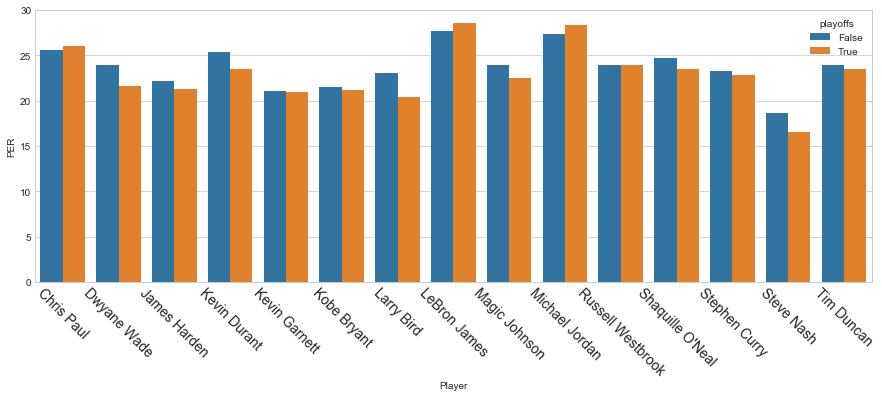

In [215]:
plt.figure(figsize=(15,5))
sns.barplot(x='Player', y='PER', hue='playoffs', data=df)

# Rotate x-labels
plt.xticks(rotation=-45, fontsize=14)

In [216]:
# Create 'difference' column between playoffs/non-playoffs.
# NOTE: VALUES IN NON-PLAYOFF ROWS FOR THESE FIELDS WILL BE MEANINGLESS, WILL REMOVE
df['PER_diff'] = df['PER'] - df['PER'].shift()
df['WS/48_diff'] = df['WS/48'] - df['WS/48'].shift()
df['USG%_diff'] = df['USG%'] - df['USG%'].shift()
df['eFG%_diff'] = df['eFG%'] - df['eFG%'].shift()

# Remove the non-playoff values
df['PER_diff'] = np.where(df['playoffs']==False, np.nan, df['PER_diff'])
df['WS/48_diff'] = np.where(df['playoffs']==False, np.nan, df['WS/48_diff'])
df['USG%_diff'] = np.where(df['playoffs']==False, np.nan, df['USG%_diff'])
df['eFG%_diff'] = np.where(df['playoffs']==False, np.nan, df['eFG%_diff'])

**NOTE: Does this change depending on seasons that some players weren't in the playoffs?? Maybe trim the datasets to ONLY playoff seasons**

In [217]:
df[df['playoffs']==True]

,Player,playoffs,WS/48,PER,USG%,eFG%,PER_diff,WS/48_diff,USG%_diff,eFG%_diff
1,Chris Paul,True,0.212000,26.050000,26.520000,53.430000,0.425000,-0.037250,2.553333,1.880000
3,Dwyane Wade,True,0.131231,21.569231,30.738462,48.569231,-2.373626,-0.036126,-0.940110,-1.159341
5,James Harden,True,0.163111,21.311111,27.588889,48.844444,-0.851389,-0.043264,0.551389,-3.218056
7,Kevin Durant,True,0.184125,23.525000,30.825000,51.350000,-1.885000,-0.037275,0.765000,-2.600000
9,Kevin Garnett,True,0.131357,20.907143,24.707143,47.450000,-0.136335,-0.034860,1.681056,-2.515217
11,Kobe Bryant,True,0.133533,21.193333,30.700000,47.660000,-0.356667,-0.011367,-0.630000,0.040000
13,Larry Bird,True,0.152417,20.358333,24.383333,47.575000,-2.718590,-0.042737,-2.016667,-3.371154
15,LeBron James,True,0.248571,28.550000,32.364286,52.928571,0.850000,0.008000,0.814286,-0.964286
17,Magic Johnson,True,0.199385,22.469231,21.446154,50.146154,-1.515385,-0.022692,-0.884615,-3.130769
19,Michael Jordan,True,0.237462,28.376923,35.530769,49.715385,1.003590,0.000862,1.930769,-0.284615


### Plot changes in PER in playoffs

In [218]:
df_per_sort = df[df['playoffs'] == True].sort_values(by='PER_diff', ascending=False)
#df_per_sort

Text(0.5,1,'Playoff Performace')

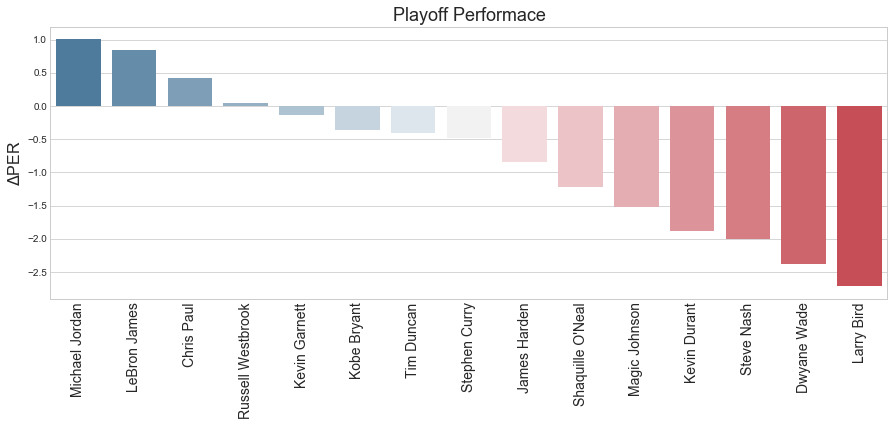

In [219]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='PER_diff', data=df_per_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$PER', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

### Plot changes in win shares per 48 mins

In [220]:
df_ws_sort = df[df['playoffs'] == True].sort_values(by='WS/48_diff', ascending=False)
#df_ws_sort

Text(0.5,1,'Playoff Performace')

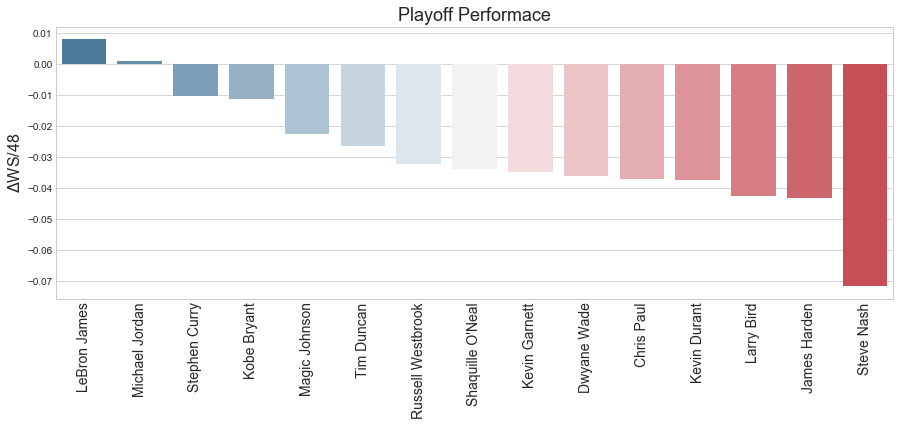

In [221]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='WS/48_diff', data=df_ws_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$WS/48', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

### Plot changes in usage

In [222]:
df_usg_sort = df[df['playoffs'] == True].sort_values(by='USG%_diff', ascending=False)
#df_usg_sort

Text(0.5,1,'Playoff Performace')

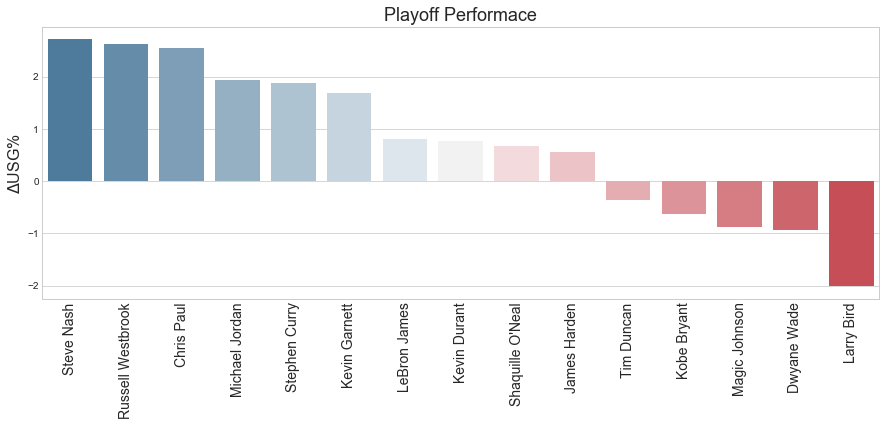

In [223]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='USG%_diff', data=df_usg_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$USG%', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

### How about shooting efficiency

In [224]:
df_efg_sort = df[df['playoffs'] == True].sort_values(by='eFG%_diff', ascending=False)
#df_efg_sort

Text(0.5,1,'Playoff Performace')

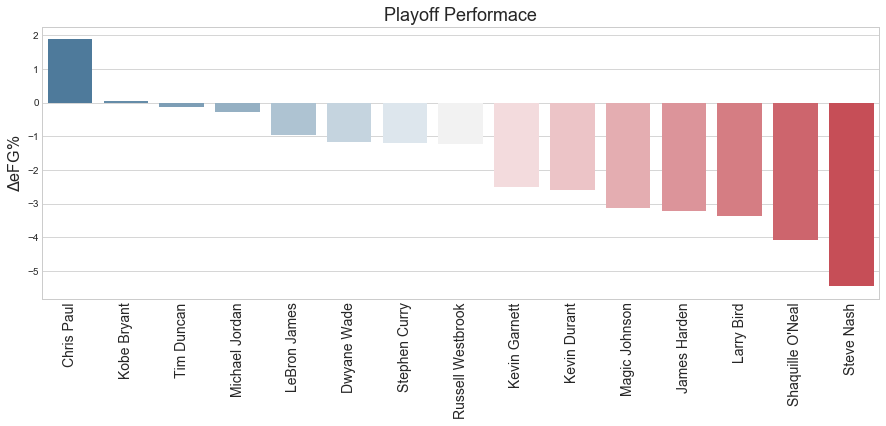

In [225]:
plt.figure(figsize=(15,5))

# Diverging color palette
my_color = sns.diverging_palette(240, 10, n=15) # Set to have 15 different colors

# Create bar plot
sns.barplot(x='Player', y='eFG%_diff', data=df_efg_sort, palette=my_color)

# Rotate x-labels
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('$\Delta$eFG%', fontsize=16)
plt.xlabel("") # Couldn't find a better way to do this...
plt.title("Playoff Performace", fontsize=18)

## 6. Now lets plot some line charts showing how these stats change over a players career
Maybe using the 'age' field will be a good choice for the x-axis.

In [262]:
# Maybe start by grouping data by age?
df3 = playoffs_seaons_full.groupby(['Age', 'Player', 'playoffs'])['WS/48', 'PER', 'USG%', 'eFG%'].mean()

In [263]:
df3 = df3.reset_index()

In [264]:
df3

,Age,Player,playoffs,WS/48,PER,USG%,eFG%
0,18.0,Kobe Bryant,False,0.079000,14.400000,24.700000,0.477
1,18.0,Kobe Bryant,True,0.042000,12.500000,29.800000,0.436
2,19.0,Kevin Durant,False,0.040000,15.800000,28.100000,0.451
3,19.0,Kevin Garnett,False,0.092000,15.800000,17.600000,0.497
4,19.0,Kobe Bryant,False,0.147000,18.500000,27.200000,0.469
5,19.0,Kobe Bryant,True,0.046000,12.800000,22.500000,0.428
6,19.0,LeBron James,False,0.078000,18.300000,28.200000,0.438
7,20.0,Chris Paul,False,0.178000,22.100000,22.200000,0.456
8,20.0,James Harden,False,0.124000,14.000000,20.400000,0.484
9,20.0,James Harden,True,0.186000,15.800000,16.100000,0.484


In [257]:
### CAN THIS ALL JUST BE DONE USING GROUPBY OBJECTS???

# Isolate players stats and separate into playoff/non-playoff
df3_kobe_playoffs = df3.loc[(df3['Player']=='Kobe Bryant') & (df3['playoffs']==True)]
df3_kobe_nonplayoffs = df3.loc[(df3['Player']=='Kobe Bryant') & (df3['playoffs']==False)]

#df3_kobe_playoffs

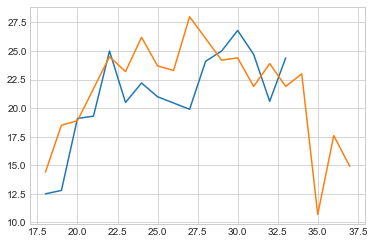

In [258]:
plt.plot(df3_kobe_playoffs['Age'], df3_kobe_playoffs['PER'])
plt.plot(df3_kobe_nonplayoffs['Age'], df3_kobe_nonplayoffs['PER'])